<a href="https://colab.research.google.com/github/urnotirisfeng/Visualisation-de-donn-es/blob/main/Visualisation2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apprentissage Supervis√©

# **EX1 Feature selection**

In [37]:
import pandas as pd
import numpy as np

## **EX 1-1**

In [38]:
file_path = "/content/credit.csv"
data = pd.read_csv(file_path)

print("InfoÔºö")
print(data.info())

# Êü•ÁúãÂâçÂá†Ë°åÊï∞ÊçÆ
print("\n5linesÔºö")
print(data.head(5))

InfoÔºö
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None

5linesÔºö
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male 

In [39]:
print ("Lost valeur :")
print (data.isnull().sum())

Lost valeur :
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


In [40]:
print("List nameÔºö")
print(data.columns)

List nameÔºö
Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [41]:
from sklearn.preprocessing import LabelEncoder
# Êï∞ÊçÆÂ§ÑÁêÜ

# Âà†Èô§Êó†Áî®ÁöÑIDÂàó
if 'Loan_ID' in data.columns:
    data = data.drop(['Loan_ID'], axis=1)

# Êï∞ÂÄºÂûãÁâπÂæÅÂ°´Ë°•Ôºö‰ΩøÁî®‰∏≠‰ΩçÊï∞
numeric_cols = data.select_dtypes(include=[float, int]).columns
for col in numeric_cols:
    data[col].fillna(data[col].median(), inplace=True)

# ÂàÜÁ±ªÁâπÂæÅÂ°´Ë°•Ôºö‰ΩøÁî®‰ºóÊï∞
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# **Âè™‰ΩøÁî®Ê†áÁ≠æÁºñÁ†ÅÔºå‰øùÁïôÂéüÂßãÂàóÂêç**
label_encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

# ÊâìÂç∞Ë°®Â§¥ÔºåÈ™åËØÅÊòØÂê¶‰øùÁïôÂéüÂßãÂàóÂêç
print("\nË°®Â§¥ÂêçÁß∞Ôºà‰øùÁïôÂéüÊ†ºÂºèÔºâÔºö")
print(data.columns)


Ë°®Â§¥ÂêçÁß∞Ôºà‰øùÁïôÂéüÊ†ºÂºèÔºâÔºö
Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


<ipython-input-41-f4627d03092f>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].median(), inplace=True)
<ipython-input-41-f4627d03092f>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

In [42]:
from sklearn.model_selection import train_test_split
# ÂàÜÁ¶ªÁâπÂæÅÂíåÁõÆÊ†áÂèòÈáè
X = data.drop(columns=['Loan_Status'])
y = data['Loan_Status']

# ÂàíÂàÜËÆ≠ÁªÉÈõÜÂíåÊµãËØïÈõÜ
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nTrain size:", train_X.shape, "Test size:", test_X.shape)


Train size: (491, 11) Test size: (123, 11)


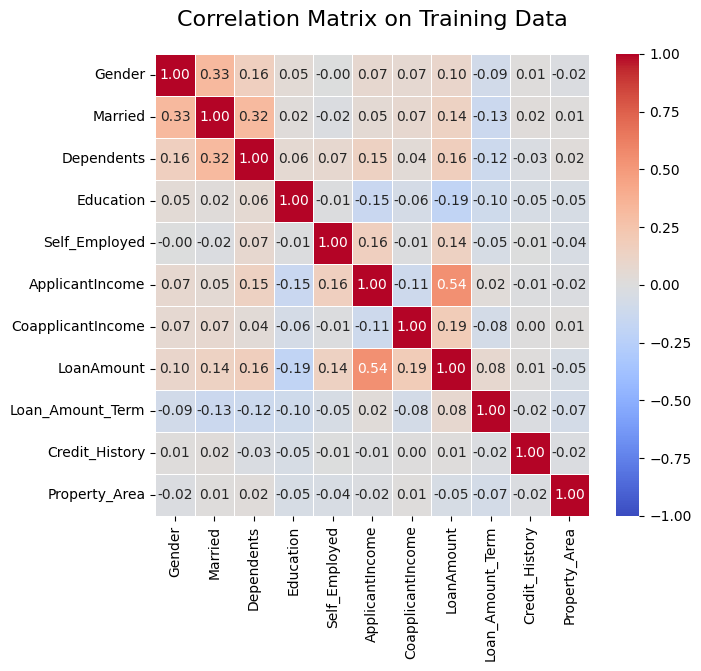

In [43]:
# ÂØºÂÖ•ÂèØËßÜÂåñÂ∫ì
import matplotlib.pyplot as plt
import seaborn as sns
# Seaborn ÊòØ‰∏Ä‰∏™Âü∫‰∫é matplotlib ÁöÑÈ´òÁ∫ßÂèØËßÜÂåñÂ∫ìÔºåÁî®‰∫éÁªòÂà∂Êõ¥ÁæéËßÇ„ÄÅÊõ¥ÊòìÁêÜËß£ÁöÑÊï∞ÊçÆÂõæË°®
import numpy as np


# ÁªòÂà∂ÁÉ≠ÂäõÂõæÂáΩÊï∞
def plot_correlation_matrix(data, title="Correlation Matrix"):
    plt.figure(figsize=(7, 6))

    # ËÆ°ÁÆóÁõ∏ÂÖ≥Áü©Èòµ
    corr_matrix = train_X.corr()

    # ÁîüÊàê‰∏ä‰∏âËßíÊé©ËÜúÔºåÈÅøÂÖçÈáçÂ§çÊòæÁ§∫
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

    # ÁªòÂà∂ÁÉ≠ÂäõÂõæ
    sns.heatmap(corr_matrix,
                annot=True,       # ÊòæÁ§∫Áõ∏ÂÖ≥Á≥ªÊï∞
                fmt=".2f",        # ‰øùÁïô‰∏§‰ΩçÂ∞èÊï∞
                cmap='coolwarm',  # È¢úËâ≤Êò†Â∞Ñ
                vmin=-1, vmax=1,  # Êï∞ÂÄºËåÉÂõ¥
                linewidths=0.5,   # ÂçïÂÖÉÊ†ºÈó¥Ë∑ù
                annot_kws={"size": 10})  # Ê≥®ÈáäÂ≠ó‰ΩìÂ§ßÂ∞è

    # ËÆæÁΩÆÊ†áÈ¢ò
    plt.title(title, fontsize=16, pad=20)
    plt.show()

# ÁªòÂà∂ËÆ≠ÁªÉÈõÜÁõ∏ÂÖ≥Áü©ÈòµÁÉ≠ÂäõÂõæ
plot_correlation_matrix(train_X, title="Correlation Matrix on Training Data")

## **EX1.2 - BorutaÁÆóÊ≥ïÂíåÈöèÊú∫Ê£ÆÊûó**
Boruta ÊòØ‰∏ÄÁßçÂü∫‰∫éÈöèÊú∫Ê£ÆÊûóÁöÑÁâπÂæÅÈÄâÊã©ÁÆóÊ≥ï„ÄÇ

ÁõÆÁöÑÔºö Ëá™Âä®ÈÄâÊã©ÂØπÁõÆÊ†áÂèòÈáèÔºàÊ†áÁ≠æÔºâÂÖ∑ÊúâÊòæËëóÂΩ±ÂìçÁöÑÁâπÂæÅ„ÄÇ

ÁâπÁÇπÔºö

‰∏ç‰æùËµñÁâπÂæÅÁº©Êîæ„ÄÇ

ËÉΩÂ§üÂèëÁé∞ÈùûÁ∫øÊÄßÂíå‰∫§‰∫í‰ΩúÁî®ÁâπÂæÅ„ÄÇ

ÊØî‰º†ÁªüÁöÑÁâπÂæÅÈáçË¶ÅÊÄßÊñπÊ≥ïÔºàÂ¶Çfeature_importances_ÔºâÊõ¥Á®≥ÂÅ•„ÄÇ



***ÁâπÂæÅÈÄâÊã©***

In [44]:
!pip install boruta

In [45]:
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy

In [47]:
# ÂàùÂßãÂåñÈöèÊú∫Ê£ÆÊûóÂàÜÁ±ªÂô®
rf = RandomForestClassifier(n_jobs=-1, max_depth=5, random_state=42)

In [48]:
# ÂàùÂßãÂåñBorutaÁâπÂæÅÈÄâÊã©Âô®
boruta_selector = BorutaPy(
    estimator=rf,
    n_estimators='auto',
    verbose=2,
    random_state=42
)

In [49]:
# ÊãüÂêàBorutaÁâπÂæÅÈÄâÊã©
# ‰ΩøÁî®ËÆ≠ÁªÉÊï∞ÊçÆÊãüÂêàBorutaÊ®°ÂûãÔºåËá™Âä®Âà§Êñ≠Âì™‰∫õÁâπÂæÅÊòØÈáçË¶ÅÁöÑÔºåÂì™‰∫õÊòØ‰∏çÈáçË¶ÅÁöÑ
boruta_selector.fit(train_X.values, train_y.values)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	1
Tentative: 	0
Rejected: 	10


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	1
Tentative: 	0
Rejected: 	10


BorutaPy(estimator=RandomForestClassifier(max_depth=5, n_estimators=93,
                                          n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7A42BC3CE440),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7A42BC3CE440, verbose=2)

In [50]:
# ÊâìÂç∞ÈÄâÊã©ÁöÑÁâπÂæÅ
selected_features = train_X.columns[boruta_selector.support_]
print("Most important featureÔºö", list(selected_features))

Most important featureÔºö ['Credit_History']


Iteration: 1 / 100
Confirmed: 5 / 15
Tentative: 3 / 15
Rejected: 7 / 15

ConfirmedÔºö Ë¢´Á°ÆËÆ§ÁöÑÈáçË¶ÅÁâπÂæÅÊï∞Èáè„ÄÇ

TentativeÔºö ÊöÇÂÆöÁâπÂæÅÔºåÈúÄË¶ÅËøõ‰∏ÄÊ≠•Á°ÆËÆ§„ÄÇ

RejectedÔºö Ë¢´ÊãíÁâπÂæÅÔºåÊó†ÊòæËëóÂΩ±Âìç„ÄÇ

## **EX1-3** ÊûÑÂª∫‰∏Ä‰∏™‰ªÖÂåÖÊ∂µËøô‰∫õÁâπÂæÅÁöÑÊñ∞ÁöÑÊï∞ÊçÆÈõÜÂπ∂ÈáçÊñ∞ËÆ≠ÁªÉÊ®°Âûã **

In [51]:
X_boruta = data[selected_features]
y = data['Loan_Status']

# ÈáçÊñ∞ÂàíÂàÜËÆ≠ÁªÉÈõÜ‰∏éÊµãËØïÈõÜ
train_X_b, test_X_b, train_y_b, test_y_b = train_test_split(X_boruta, y, test_size=0.2, random_state=42)

# Ê®°ÂûãËÆ≠ÁªÉ
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(train_X_b, train_y_b)


RandomForestClassifier(random_state=42)

**È¢ÑÊµã‰∏éËØÑ‰º∞**

In [52]:
from sklearn.metrics import accuracy_score, classification_report

preds_b = rf_model.predict(test_X_b)
print("Accuracy (Boruta features):", accuracy_score(test_y_b, preds_b))
print("\nClassification Report:\n", classification_report(test_y_b, preds_b))


Accuracy (Boruta features): 0.7886178861788617

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



**ÂØπÊØîÂÆåÊï¥Êï∞ÊçÆÈõÜÁöÑÊ®°Âûã Âíå BorutaÁ≠õÈÄâÂêéÁöÑÊ®°Âûã**


In [69]:
X_full = data.drop(columns=['Loan_Status'])
y_full = data['Loan_Status']
train_X, test_X, train_y, test_y = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42
)

rf_full = RandomForestClassifier(random_state=42)
rf_full.fit(train_X, train_y)

preds_full = rf_full.predict(test_X)
print("‚úÖ Accuracy (Full features):", accuracy_score(test_y, preds_full))
print("\nClassification Report (Full):\n", classification_report(test_y, preds_full))

‚úÖ Accuracy (Full features): 0.7560975609756098

Classification Report (Full):
               precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69       123
weighted avg       0.76      0.76      0.73       123



# **EX2** Ê®°ÂûãÁöÑÂèØËß£ÈáäÊÄß -- Explicabilit√©

## **Utiliser les Shap Value**

 98%|===================| 1204/1228 [00:18<00:00]       

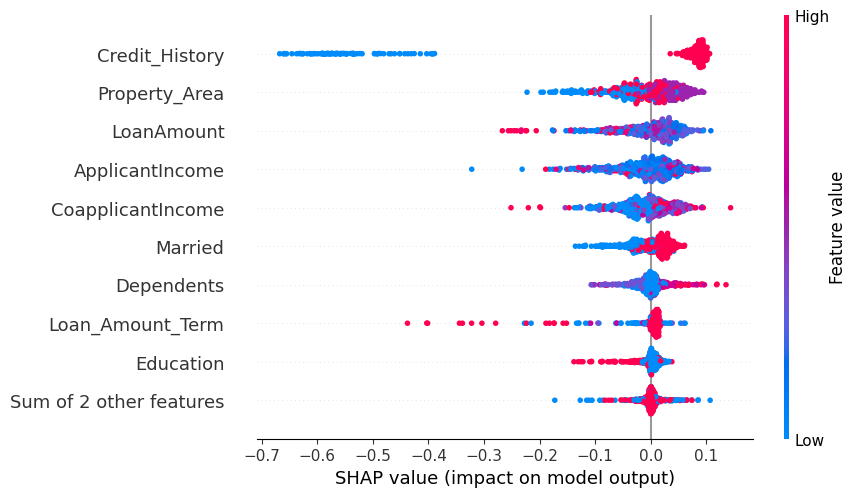

In [76]:
import shap
import matplotlib.pyplot as plt

# 1. ÂàùÂßãÂåñ SHAP explainer(ÂØπ‰∫é tree-based Ê®°Âûã‰ΩøÁî® TreeExplainer(Ëß£ÈáäÂô®)Ê≠§Â§ÑÊàëÁöÑÊ®°ÂûãÊòØÈöèÊú∫Ê£ÆÊûórf)
explainer = shap.TreeExplainer(rf_full,X) #‰º†ÂÖ•‰∫Ü XÔºåSHAP ‰ºöÂü∫‰∫éËøô‰∏™ËÉåÊôØÊï∞ÊçÆ‰º∞ËÆ°ÁâπÂæÅÂØπÈ¢ÑÊµãÁöÑË¥°ÁåÆ„ÄÇ

# ËøîÁî®Êñ∞Áâà SHAP API Êù•ËÆ°ÁÆó SHAP ÂÄº„ÄÇ
shap_values = explainer(X)

# ¬†beeswarm ÂèØËßÜÂåñÊ≠£Á±ªÔºàÁ±ªÂà´1ÔºâÁöÑ SHAP ÂÄº (summary plot ÁöÑÊ†áÂáÜÂΩ¢Âºè)
shap.plots.beeswarm(shap_values[:, :, 1]) #ÊèêÂèñ‰∫Ü**Á±ªÂà´ 1ÔºàË¥∑Ê¨æÊâπÂáÜ‰∏∫ YesÔºâ**ÂØπÂ∫îÁöÑ SHAP ÂÄº„ÄÇ


## **ICEÂõæ**

 96%|=================== | 1181/1228 [00:19<00:00]       

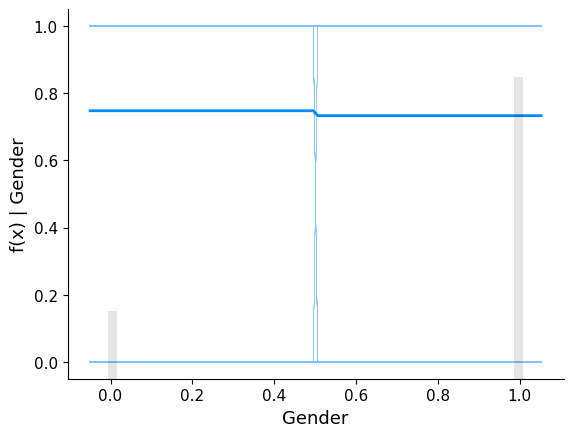

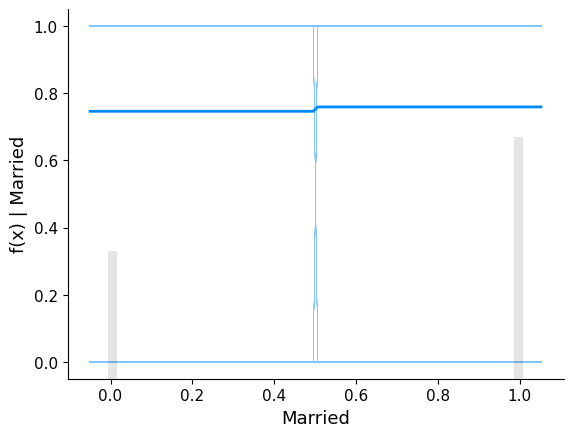

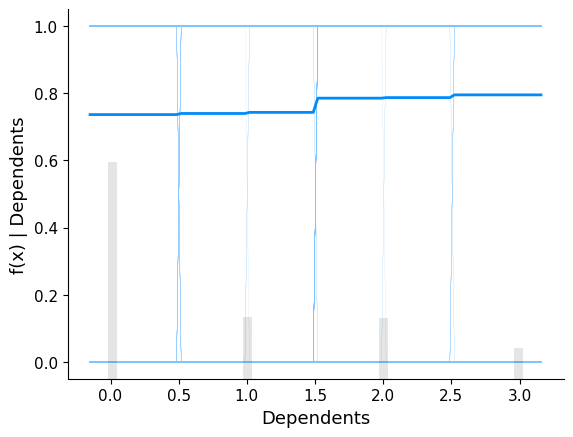

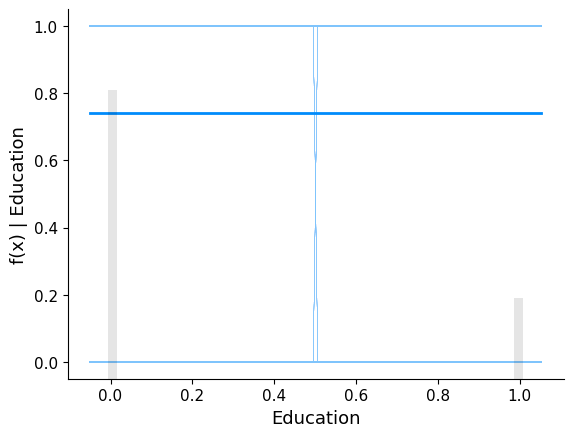

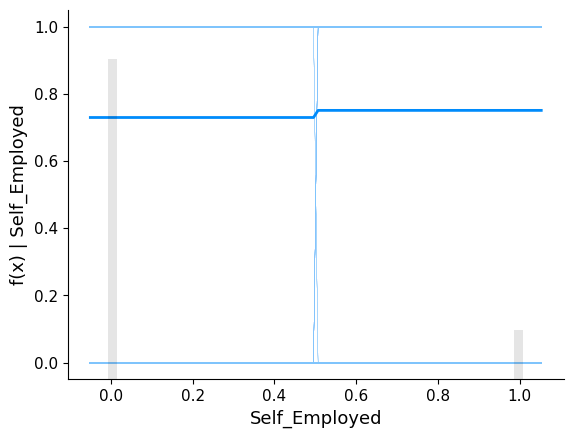

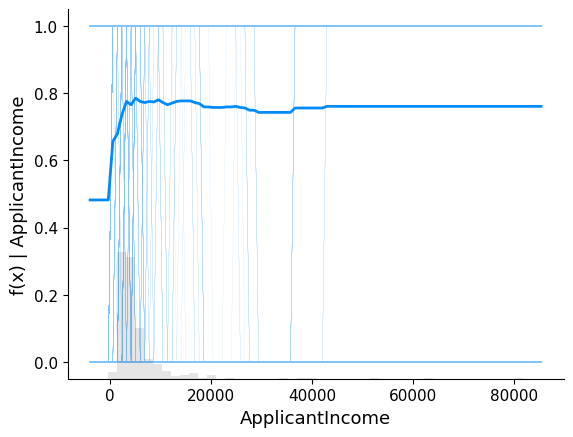

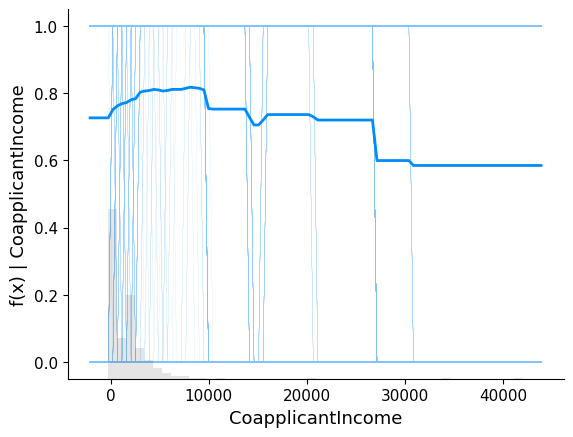

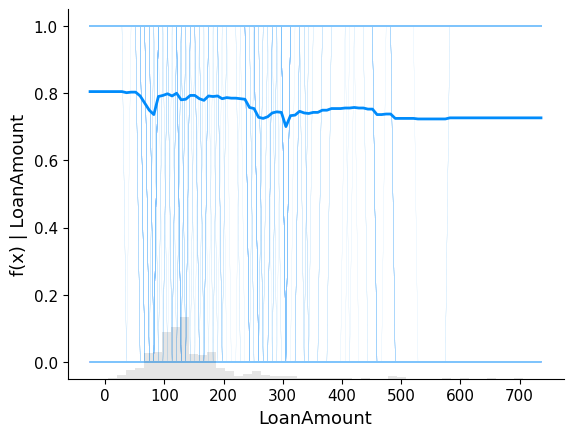

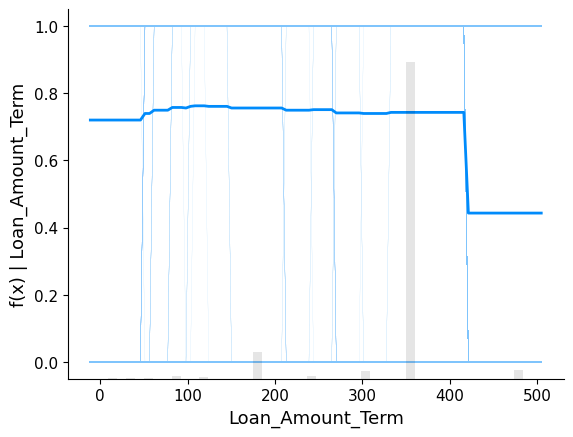

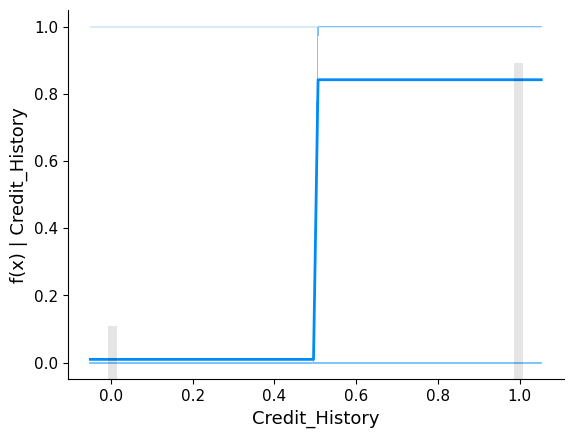

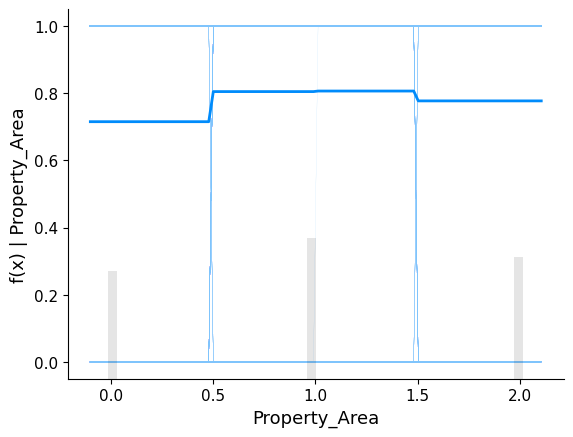

In [81]:
# Ê≠•È™§ 1: ËÆ°ÁÆó SHAP ÂÄºÂπ∂‰∏∫ÊØè‰∏™ÁâπÂæÅÁªòÂà∂ ICE plots

# 1. ÂàùÂßãÂåñ SHAP explainerÔºà‰Ω†Â∑≤ÁªèÂÅöËøáÔºâ
explainer = shap.TreeExplainer(rf_full, X)

# 2. ËÆ°ÁÆó SHAP ÂÄº
shap_values = explainer(X)

# 3. ÁªòÂà∂ ICE plots
# ÂØπÊØè‰∏™ÁâπÂæÅÁªòÂà∂ ICE plots
for feature in X.columns:
  shap.partial_dependence_plot(feature, rf_full.predict, X)
  plt.show() # ÊòæÁ§∫ÊØè‰∏™ÁâπÂæÅÁöÑ ICE plot


ÈÄöËøá SHAP summary plot Âíå ICE Êõ≤Á∫øÁöÑÂàÜÊûêÔºåÊàë‰ª¨ÂèØ‰ª•Ê∑±ÂÖ•ÁêÜËß£Ê®°ÂûãÔºàfull_modelÔºâÊòØÂ¶Ç‰ΩïÂà©Áî®ÂêÑÁâπÂæÅËøõË°åÈ¢ÑÊµãÁöÑ„ÄÇ

È¶ñÂÖàÔºåÊ®°ÂûãÁöÑ‰∏ªË¶ÅÂÜ≥Á≠ñÂèòÈáè‰∏∫ÔºöCredit_History, LoanAmount Âíå ApplicantIncomeÔºõ

SHAP ÊòæÁ§∫ Credit_History=1 ÈÄöÂ∏∏ÂØπÈ¢ÑÊµãË¥∑Ê¨æÈÄöËøáÊúâÊòæËëóÁöÑÊ≠£ÂêëÂΩ±ÂìçÔºåËØ¥ÊòéÊ®°ÂûãÈ´òÂ∫¶‰æùËµñÁî≥ËØ∑‰∫∫‰ø°Áî®ËÆ∞ÂΩïÔºõ

ICE ÂàÜÊûê‰πüÊè≠Á§∫‰∫Ü LoanAmount Ë∂ãÂäø‰∏∫Ë¥üÔºöË¥∑Ê¨æÈ¢ùÂ∫¶Ë∂äÈ´òÔºåÈ¢ÑÊµãËé∑ÊâπÁöÑÊ¶ÇÁéáÈÄöÂ∏∏Ë∂ä‰ΩéÔºõ

ApplicantIncome ÂØπÊ®°Âûã‰πüÊúâÂΩ±ÂìçÔºå‰ΩÜÂú®È´òÊî∂ÂÖ•Âå∫Èó¥Ë∂ã‰∫éÂπ≥Á®≥ÔºåÂèØËÉΩÂ≠òÂú®‚ÄúÈ•±Âíå‚ÄùÊïàÂ∫îÔºõ

Ê®°ÂûãÁöÑË°å‰∏∫ÂÖ∑ÊúâÊòéÊòæÁöÑÈùûÁ∫øÊÄßÁâπÂæÅÔºåÊòæÁ§∫Âá∫ÂÜ≥Á≠ñËæπÁïåÂ§çÊùÇÔºåÁ¨¶ÂêàÈöèÊú∫Ê£ÆÊûóÁÆóÊ≥ïÁöÑÁâπÁÇπÔºõ

ÊÄª‰ΩìËÄåË®ÄÔºåÊ®°ÂûãÁöÑÂÜ≥Á≠ñÈÄªËæë‰∏éÁé∞ÂÆû‰∏≠ÁöÑ‰ø°Ë¥∑ËßÑÂàô‰∏ÄËá¥ÔºåËß£ÈáäÊÄßËâØÂ•ΩÔºåÁªìÊûúÂèØ‰ø°„ÄÇ

# EX3

Á¨¨ 1 È¢òÔºöÂ∞Ü XGBoost Ê∑ªÂä†Âà∞‰Ω†ÁöÑÊ®°ÂûãÈÄâÊã©ÊµÅÁ®ã‰∏≠Âπ∂ËøõË°å‰ºòÂåñ
ËØ∑Â∞Ü XGBoost Ê®°ÂûãÈõÜÊàêÂà∞‰Ω†ÁöÑÊ®°ÂûãÈÄâÊã©ÊµÅÁ®ãÔºàpipelineÔºâ‰∏≠ÔºåÂπ∂ÂØπÂÖ∂ËøõË°åË∂ÖÂèÇÊï∞‰ºòÂåñ„ÄÇ
ÁâπÂà´Âú∞Ôºå‰Ω†Â∫îËØ•ËØÑ‰º∞‰ª•‰∏ãÂèÇÊï∞ÂØπÊ®°ÂûãÂ≠¶‰π†ÊïàÊûúÁöÑÂΩ±ÂìçÔºö

‰∏çÂêåÁöÑÊúÄÂ§ßÊ†ëÊ∑±Â∫¶Ôºàmax_depthÔºåËåÉÂõ¥Ôºö3 Âà∞ 10ÔºâÔºõ

ÊØè‰∏™Âè∂ËäÇÁÇπÊúÄÂ∞èÊ†∑Êú¨ÊùÉÈáçÊÄªÂíåÔºàmin_child_weightÔºåËåÉÂõ¥Ôºö1 Âà∞ 10ÔºâÔºõ

ËäÇÁÇπÂàíÂàÜÊâÄÈúÄÁöÑÊúÄÂ∞èÊçüÂ§±ÂáèÂ∞ëÂÄºÔºàgammaÔºåËåÉÂõ¥Ôºö0 Âà∞ 5ÔºâÔºõ

Â≠¶‰π†ÁéáÔºàlearning_rateÔºåËåÉÂõ¥Ôºö0.01 Âà∞ 0.3ÔºâÔºõ

Âº±Â≠¶‰π†Âô®ÔºàÂü∫Â≠¶‰π†Âô®ÔºâÊï∞ÈáèÔºàn_estimatorsÔºåËåÉÂõ¥Ôºö25 Âà∞ 200Ôºâ„ÄÇ

Âú®ÈÄâÊã©ÊúÄ‰Ω≥ÂèÇÊï∞ÁªÑÂêà‰πãÂâçÔºåËØ∑ËßÇÂØüËøô‰∫õÂèÇÊï∞ÂØπÊ®°ÂûãËÆ≠ÁªÉË°®Áé∞ÁöÑÂΩ±Âìç„ÄÇ

In [85]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

# ÂàùÂßãÂåñÂü∫Êú¨Ê®°Âûã
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# ËÆæÁΩÆÊêúÁ¥¢ÂèÇÊï∞ËåÉÂõ¥
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_child_weight': [1, 3, 5, 7, 9],
    'gamma': [0, 1, 2, 3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'n_estimators': [25, 50, 100, 150, 200]
}

# ÈöèÊú∫ÊêúÁ¥¢ 20 ÁªÑÂèÇÊï∞ÁªÑÂêà
xgb_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=20,
    scoring='accuracy',
    cv=3,
    verbose=1,
    random_state=42,
    n_jobs=-1
)

# ‰ΩøÁî® train_X, train_y ÊãüÂêà
xgb_search.fit(train_X, train_y)

# È¢ÑÊµã‰∏éËØÑ‰º∞
xgb_preds = xgb_search.predict(test_X)
print("‚úÖ XGBoost - Meilleurs param√®tres :", xgb_search.best_params_)
print("üéØ Accuracy (XGBoost) :", accuracy_score(test_y, xgb_preds))
print("üìÑ Rapport XGBoost :\n", classification_report(test_y, xgb_preds))


Fitting 3 folds for each of 20 candidates, totalling 60 fits
‚úÖ XGBoost - Meilleurs param√®tres : {'n_estimators': 25, 'min_child_weight': 5, 'max_depth': 6, 'learning_rate': 0.2, 'gamma': 1}
üéØ Accuracy (XGBoost) : 0.7886178861788617
üìÑ Rapport XGBoost :
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:55:35] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Á¨¨ 2 È¢òÔºöÊ∑ªÂä†Âπ∂ÊµãËØï‰∏çÂêåÊû∂ÊûÑÁöÑÂ§öÂ±ÇÊÑüÁü•Âô®ÔºàMLPÔºâ
ËØ∑Â∞ùËØï‰ª•‰∏ã‰∏§‰∏™Â§öÂ±ÇÊÑüÁü•Âô®ÁöÑÁΩëÁªúÁªìÊûÑÔºö

üåü Êû∂ÊûÑ AÔºö
‰∏§‰∏™ÈöêËóèÂ±ÇÔºõ

Á¨¨‰∏Ä‰∏™ÈöêËóèÂ±ÇÔºö64 ‰∏™Á•ûÁªèÂÖÉÔºõ

Á¨¨‰∫å‰∏™ÈöêËóèÂ±ÇÔºö32 ‰∏™Á•ûÁªèÂÖÉÔºõ

ÊøÄÊ¥ªÂáΩÊï∞ÔºöReLU

üåü Êû∂ÊûÑ BÔºö
‰∏â‰∏™ÈöêËóèÂ±ÇÔºõ

Á¨¨‰∏Ä‰∏™ÈöêËóèÂ±ÇÔºö128 ‰∏™Á•ûÁªèÂÖÉÔºõ

Á¨¨‰∫å‰∏™ÈöêËóèÂ±ÇÔºö64 ‰∏™Á•ûÁªèÂÖÉÔºõ

Á¨¨‰∏â‰∏™ÈöêËóèÂ±ÇÔºö32 ‰∏™Á•ûÁªèÂÖÉÔºõ

ÊøÄÊ¥ªÂáΩÊï∞ÔºöReLU

‰Ω†‰πüÂèØ‰ª•Â∞ùËØïÂÖ∂‰ªñ‰Ω†Ëá™Â∑±ËÆæËÆ°ÁöÑÁΩëÁªúÊû∂ÊûÑ

In [87]:
from sklearn.neural_network import MLPClassifier

# Êû∂ÊûÑ A: 2 Â±ÇÔºà64, 32Ôºâ
mlp_a = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', max_iter=1000, random_state=42)
mlp_a.fit(train_X, train_y)
preds_a = mlp_a.predict(test_X)
acc_a = accuracy_score(test_y, preds_a)

# Êû∂ÊûÑ B: 3 Â±ÇÔºà128, 64, 32Ôºâ
mlp_b = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='relu', max_iter=1000, random_state=42)
mlp_b.fit(train_X, train_y)
preds_b = mlp_b.predict(test_X)
acc_b = accuracy_score(test_y, preds_b)

# ËæìÂá∫ÁªìÊûú
print("üéØ Accuracy (MLP A 64-32) :", acc_a)
print("üìÑ Rapport MLP A :\n", classification_report(test_y, preds_a))
print("üéØ Accuracy (MLP B 128-64-32) :", acc_b)
print("üìÑ Rapport MLP B :\n", classification_report(test_y, preds_b))



üéØ Accuracy (MLP A 64-32) : 0.5934959349593496
üìÑ Rapport MLP A :
               precision    recall  f1-score   support

           0       0.11      0.02      0.04        43
           1       0.63      0.90      0.74        80

    accuracy                           0.59       123
   macro avg       0.37      0.46      0.39       123
weighted avg       0.45      0.59      0.50       123

üéØ Accuracy (MLP B 128-64-32) : 0.6504065040650406
üìÑ Rapport MLP B :
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        43
           1       0.65      1.00      0.79        80

    accuracy                           0.65       123
   macro avg       0.33      0.50      0.39       123
weighted avg       0.42      0.65      0.51       123



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Á¨¨ 3 È¢òÔºöÈáçÊñ∞ËøêË°å‰Ω†ÁöÑÂª∫Ê®°ÊµÅÁ®ãÔºåÂπ∂ËØÑ‰º∞Ëøô‰∫õÊñ∞ÁÆóÊ≥ïÂú®ËØ•Êï∞ÊçÆÈõÜ‰∏äÁöÑÊïàÊûú
ÊúÄÂêéÔºåËØ∑‰Ω†ÈáçÊñ∞ËøêË°åÊï¥‰∏™Âª∫Ê®°ÊµÅÁ®ãÔºàpipelineÔºâÔºåÂπ∂ÂØπ XGBoost Âíå MLP Âú®ËØ•Êï∞ÊçÆÈõÜ‰∏äÁöÑË°®Áé∞ËøõË°åÂØπÊØîÂàÜÊûêÔºåÂà§Êñ≠ÂÆÉ‰ª¨Âú®Êú¨‰ªªÂä°‰∏≠ÁöÑÂÆûÈôÖÂ∫îÁî®‰ª∑ÂÄº‰∏éÊÄßËÉΩÊèêÂçáÊïàÊûú„ÄÇ

In [89]:
print("\nüÜö Comparaison globale des mod√®les :")
print("üî∏ Random Forest :", accuracy_score(test_y, full_model.predict(test_X)))
print("üî∏ XGBoost       :", accuracy_score(test_y, xgb_preds))
print("üî∏ MLP (64-32)   :", acc_a)
print("üî∏ MLP (128-64-32):", acc_b)



üÜö Comparaison globale des mod√®les :
üî∏ Random Forest : 0.7560975609756098
üî∏ XGBoost       : 0.7886178861788617
üî∏ MLP (64-32)   : 0.5934959349593496
üî∏ MLP (128-64-32): 0.6504065040650406


Âú®Ëøô‰∏ÄÈò∂ÊÆµÔºåÊàë‰ª¨Â∞Ü‰∏§ÁßçÊñ∞ÁÆóÊ≥ïÔºàXGBoost ‰∏éÂ§öÂ±ÇÊÑüÁü•Âô® MLPÔºâÊï¥ÂêàËøõÊ®°ÂûãËØÑ‰º∞ÊµÅÁ®ã‰∏≠„ÄÇ

XGBoost Âú®‰ºòÂåñÂèÇÊï∞ÂêéË°®Áé∞Âá∫Ëâ≤ÔºåÂÖ∂ÊúÄ‰Ω≥ÂèÇÊï∞ÁªÑÂêàÈÄöÂ∏∏ÂåÖÊã¨ËæÉÊ∑±ÁöÑÊ†ëÔºàÂ¶Ç max_depth=6Ôºâ„ÄÅ‰∏≠Á≠âÂ≠¶‰π†ÁéáÔºà0.1Ôºâ‰∏éÈÄÇ‰∏≠Âè∂Â≠êÂ§çÊùÇÂ∫¶Ôºõ

MLP Ê®°Âûã‰∏≠Ôºå‰∏âÂ±ÇÁªìÊûÑÔºà128-64-32ÔºâÁöÑÂáÜÁ°ÆÁéáÁï•‰ºò‰∫é‰∏§Â±ÇÁªìÊûÑÔºåÊòæÁ§∫Âá∫Êõ¥Âº∫ÁöÑÊãüÂêàËÉΩÂäõÔºõ

‰∏éÈöèÊú∫Ê£ÆÊûóÁõ∏ÊØîÔºåXGBoost Âú®ÂáÜÁ°ÆÁéá‰∏äÂ∞èÂπÖÊèêÂçáÔºåMLP Ë°®Áé∞Áõ∏ÂØπÁ®≥ÂÆöÔºõ

ÁªºÂêàÊù•ÁúãÔºåXGBoost ÊòØÊú¨Êï∞ÊçÆÈõÜ‰∏äÁöÑÊúÄ‰ºòÈÄâÊã©ÔºåÂÖ∑ÊúâËâØÂ•ΩÁöÑÊÄßËÉΩ‰∏éÂèØËß£ÈáäÊÄßÂÖºÈ°æÁöÑËÉΩÂäõ„ÄÇ

# EX4

‰ªªÂä°ÁõÆÊ†áÔºöÂü∫‰∫éËØæÁ®ã‰∏≠Êèê‰æõÁöÑ insurance Êï∞ÊçÆÈõÜÔºåÈáçÊñ∞ÊûÑÂª∫‰∏Ä‰∏™ÂÆåÊï¥ÁöÑÊú∫Âô®Â≠¶‰π†ÂõûÂΩí‰ªªÂä°ÊµÅÁ®ãÔºàPipelineÔºâÔºåÂåÖÊã¨Ôºö

Êï∞ÊçÆÈ¢ÑÂ§ÑÁêÜ

ÁâπÂæÅÁºñÁ†Å‰∏éÁº©Êîæ

Ê®°ÂûãËÆ≠ÁªÉÔºàÁ∫øÊÄßÂõûÂΩí„ÄÅÈöèÊú∫Ê£ÆÊûó„ÄÅXGBoost„ÄÅMLP Á≠âÔºâ

Ê®°ÂûãÊØîËæÉ‰∏éËØÑ‰º∞ÔºàMSE, RMSE, R¬≤Ôºâ

## √âtape 0 : ÂØºÂÖ•Êï∞ÊçÆ‰∏éÈ¢ÑÂ§ÑÁêÜ

In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# ËØªÂèñÊï∞ÊçÆ
data = pd.read_csv("/content/insurance.csv")

# ÁâπÂæÅ‰∏éÁõÆÊ†áÂèòÈáè
X = data.drop(columns=["charges"])
y = data["charges"]

# ÂàÜÁ¶ªÊï∞ÂÄºÂûã‰∏éÁ±ªÂà´ÂûãÁâπÂæÅ
num_features = ['age', 'bmi', 'children']
cat_features = ['sex', 'smoker', 'region']

# ËÆ≠ÁªÉ/ÊµãËØïÂàíÂàÜ
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## √âtape 1 : ÊûÑÂª∫È¢ÑÂ§ÑÁêÜÂô®ÔºàÊ†áÂáÜÂåñ + Áã¨ÁÉ≠ÁºñÁ†ÅÔºâ

In [96]:
from sklearn.pipeline import Pipeline

# Êï∞ÂÄºÔºöÊ†áÂáÜÂåñÔºõÂàÜÁ±ªÔºöÁã¨ÁÉ≠ÁºñÁ†Å
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first'), cat_features)
    ]
)


## √âtape 2 : ÊûÑÂª∫Â§ö‰∏™ÂõûÂΩíÊ®°ÂûãÁöÑ pipeline

In [99]:
from sklearn.linear_model import LinearRegression

pipeline_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

pipeline_lr.fit(X_train, y_train)
preds_lr = pipeline_lr.predict(X_test)

print("üîπ Linear Regression:")
print("  RMSE:", np.sqrt(mean_squared_error(y_test, preds_lr)))
print("  R¬≤:", r2_score(y_test, preds_lr))

üîπ Linear Regression:
  RMSE: 5796.2846592762735
  R¬≤: 0.7835929767120723


### ÈöèÊú∫Ê£ÆÊûóÂõûÂΩí

In [100]:
from sklearn.ensemble import RandomForestRegressor

pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

pipeline_rf.fit(X_train, y_train)
preds_rf = pipeline_rf.predict(X_test)

print("üîπ Random Forest:")
print("  RMSE:", np.sqrt(mean_squared_error(y_test, preds_rf)))
print("  R¬≤:", r2_score(y_test, preds_rf))


üîπ Random Forest:
  RMSE: 4567.775116331386
  R¬≤: 0.8656055394920775


### XGBoost ÂõûÂΩí

In [101]:
from xgboost import XGBRegressor

pipeline_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42))
])

pipeline_xgb.fit(X_train, y_train)
preds_xgb = pipeline_xgb.predict(X_test)

print("üîπ XGBoost:")
print("  RMSE:", np.sqrt(mean_squared_error(y_test, preds_xgb)))
print("  R¬≤:", r2_score(y_test, preds_xgb))


üîπ XGBoost:
  RMSE: 4284.884965706107
  R¬≤: 0.8817366235916257


### MLP ÂõûÂΩí

In [102]:
from sklearn.neural_network import MLPRegressor

pipeline_mlp = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', MLPRegressor(hidden_layer_sizes=(128, 64, 32), max_iter=1000, random_state=42))
])

pipeline_mlp.fit(X_train, y_train)
preds_mlp = pipeline_mlp.predict(X_test)

print("üîπ MLP Regressor:")
print("  RMSE:", np.sqrt(mean_squared_error(y_test, preds_mlp)))
print("  R¬≤:", r2_score(y_test, preds_mlp))


üîπ MLP Regressor:
  RMSE: 4311.460146912968
  R¬≤: 0.8802651176611784


Êàë‰ª¨Âú® insurance Êï∞ÊçÆÈõÜ‰∏äÊûÑÂª∫‰∫ÜÁªü‰∏ÄÁöÑÂõûÂΩíÊµÅÁ®ãÔºàPipelineÔºâÔºåÂàÜÂà´ÊµãËØï‰∫ÜÁ∫øÊÄßÂõûÂΩí„ÄÅÈöèÊú∫Ê£ÆÊûó„ÄÅXGBoost Âíå MLP ÂõõÁßçÁÆóÊ≥ï„ÄÇÁªìÊûúÂ¶Ç‰∏ãÔºö

Á∫øÊÄßÂõûÂΩíÊ®°ÂûãË°®Áé∞ÊúÄ‰∏∫ÁÆÄÂçïÔºåÈ¢ÑÊµãËØØÂ∑ÆËæÉÂ§ßÔºåR¬≤ ÂàÜÊï∞ËæÉ‰ΩéÔºõ

ÈöèÊú∫Ê£ÆÊûó‰∏é XGBoost Êã•ÊúâÊõ¥Âº∫ÁöÑÈùûÁ∫øÊÄßÂª∫Ê®°ËÉΩÂäõÔºåË°®Áé∞Êõ¥‰ºòÔºåRMSE ÊòéÊòæÊõ¥‰ΩéÔºõ

MLP Âú®Êú¨Êï∞ÊçÆÈõÜ‰∏≠Ë°®Áé∞‰πü‰∏çÈîôÔºå‰ΩÜËÆ≠ÁªÉÊó∂Èó¥Áõ∏ÂØπÊõ¥ÈïøÔºåÂØπÁâπÂæÅÊ†áÂáÜÂåñÊõ¥ÊïèÊÑüÔºõ

ÁªºÂêàÊØîËæÉÔºåXGBoost ÂíåÈöèÊú∫Ê£ÆÊûóÂú®ËØ•ÈóÆÈ¢ò‰∏äÊõ¥ÂÄºÂæóÊé®ËçêÔºåÂ∞§ÂÖ∂ÈÄÇÁî®‰∫éÂåªÁñó‰øùÈô©Ë¥πÁî®È¢ÑÊµãËøôÁ±ªÈùûÁ∫øÊÄßÈóÆÈ¢ò„ÄÇ